In [1]:
import matplotlib.pyplot as plt
import neurokit2 as nk
import numpy as np
import pandas as pd

In [2]:
location_baseline = (
    lambda on: f'data/CONTROL_BREATHING_RECORDINGS/OCHOTNIK_{on}/CLEAN_DATA_BASELINE/OCH_{on}_CLEAN_CB_BASELINE.csv'
)

In [3]:
def find_peaks(
    signal: np.array,
    sampling_rate: int = 200,
    mindelay: float = 0.3,
) -> np.array:
    # Fill missing values
    signal = nk.signal_fillmissing(signal)
    cleaned_signal = nk.ppg_clean(signal, sampling_rate=sampling_rate, method='elgendi')
    peaks_up = nk.ppg_findpeaks(cleaned_signal, sampling_rate=sampling_rate, method='elgendi', mindelay=mindelay)[
        'PPG_Peaks'
    ]
    peaks_down = nk.ppg_findpeaks(
        cleaned_signal * -1, sampling_rate=sampling_rate, method='elgendi', mindelay=mindelay
    )['PPG_Peaks']
    peaks = np.sort(np.concatenate((peaks_up, peaks_down)))
    return peaks

In [4]:
def plot_signal_w_peaks(signal: np.array, peaks: np.array, start: int, end: int):
    plt.figure(figsize=(15, 6), dpi=600)
    plt.plot(signal[start:end])
    plt.xlim([0, end - start])
    peaks = peaks[(peaks > start) & (peaks < end)]
    plt.scatter(peaks - start, signal[peaks], c='r')

    plt.vlines(x=peaks[3] - start, ymin=0, ymax=signal[peaks[5]] + 3, colors='red', linestyles='dotted', linewidth=1)
    plt.vlines(x=peaks[5] - start, ymin=0, ymax=signal[peaks[5]] + 3, colors='red', linestyles='dotted', linewidth=1)
    plt.annotate(
        '',
        xy=(peaks[3] - start, signal[peaks[3]] + 3),
        xytext=(peaks[5] - start, signal[peaks[3]] + 3),
        arrowprops=dict(arrowstyle='<->', color='red'),
        fontsize=12,
        color='red',
    )
    plt.text(
        (peaks[3] - start + peaks[5] - start) / 2 - 50,
        signal[peaks[3]] + 5,
        r'$RR(i), HP = \frac{1}{RR}$',
        fontsize=14,
        color='red',
    )
    plt.annotate(
        'SAP(i)',
        xy=(peaks[3] - start - 1, signal[peaks[3]] + 1),
        xytext=(peaks[3] - start - 48, signal[peaks[3]] + 6),
        arrowprops=dict(arrowstyle='->', color='red'),
        fontsize=12,
        color='red',
    )
    plt.hlines(y=signal[peaks[3]], xmin=0, xmax=230, colors='red', linestyles='dotted', linewidth=1)

    plt.ylim([np.min(signal - 5), np.max(signal) + 5])
    plt.title('ABP signal during controlled breathing', fontsize=16)
    plt.xlabel('Miliseconds', fontsize=14)
    plt.ylabel('ABP [mmHg]', fontsize=14)
    plt.show()

In [5]:
def plot_widnowed_signal_w_peaks(signal: np.array, peaks: np.array, n_windows: int):
    signal_widnowed = np.linspace(0, len(signal), n_windows + 1).astype(int)
    for i in range(1):
        plot_signal_w_peaks(signal, peaks, signal_widnowed[i], signal_widnowed[i + 1])

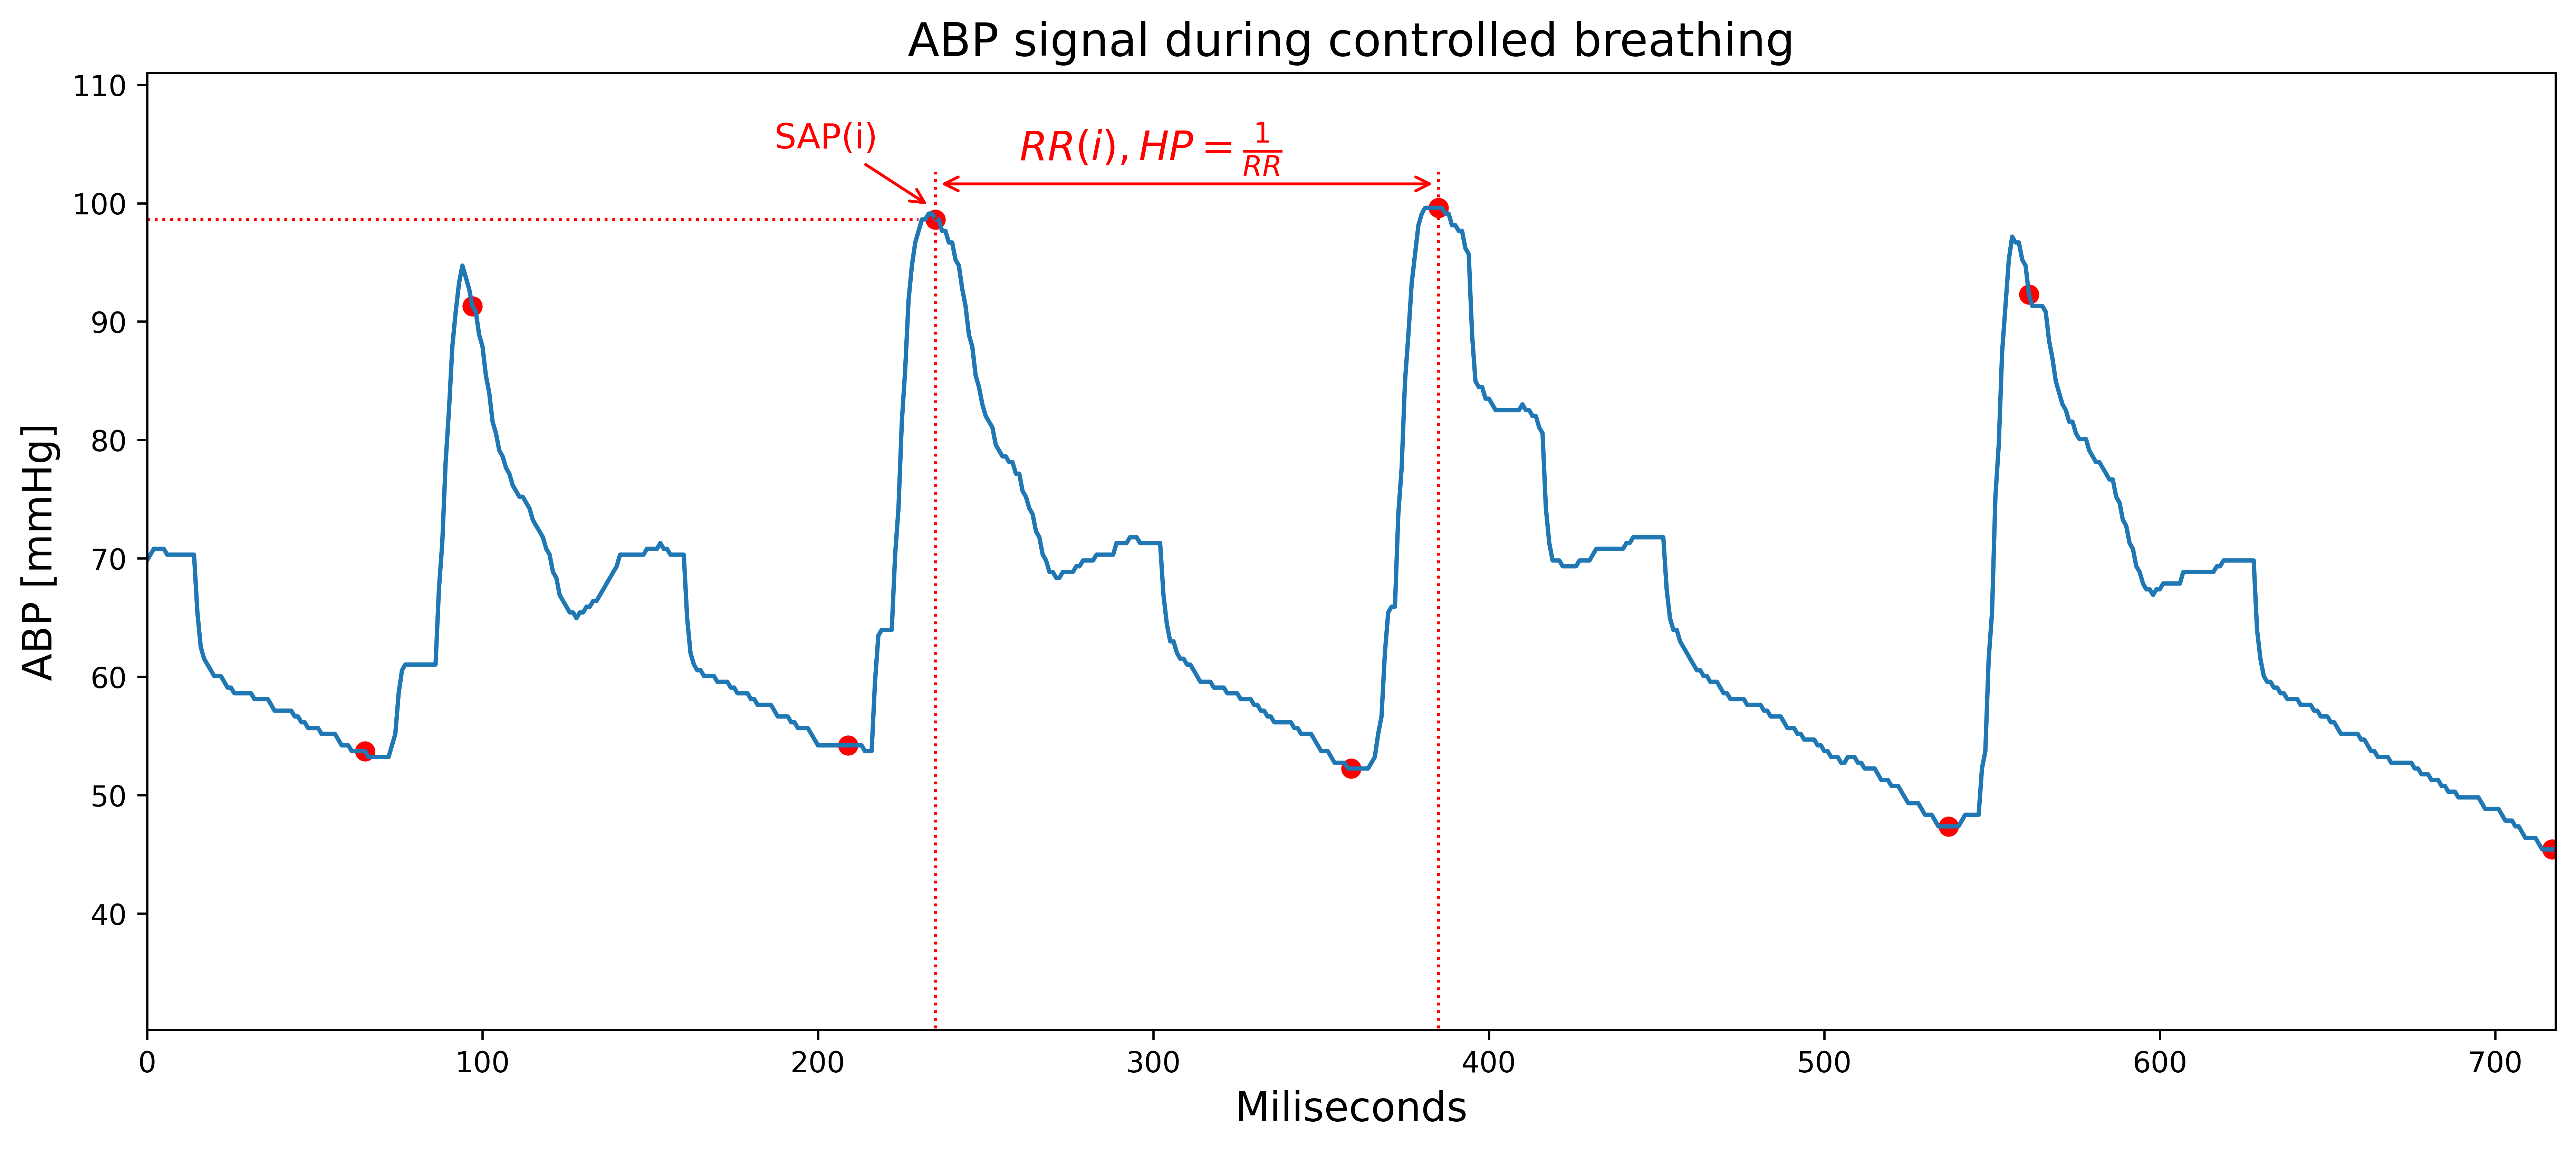

In [6]:
data = pd.read_csv(location_baseline(1), sep=';', decimal=',')['abp_cnap[mmHg]'].values[3040:]
peaks = find_peaks(data)
plot_widnowed_signal_w_peaks(data, peaks, 80)